# 9.1 A Brief matplotlib API Primer

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [8]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


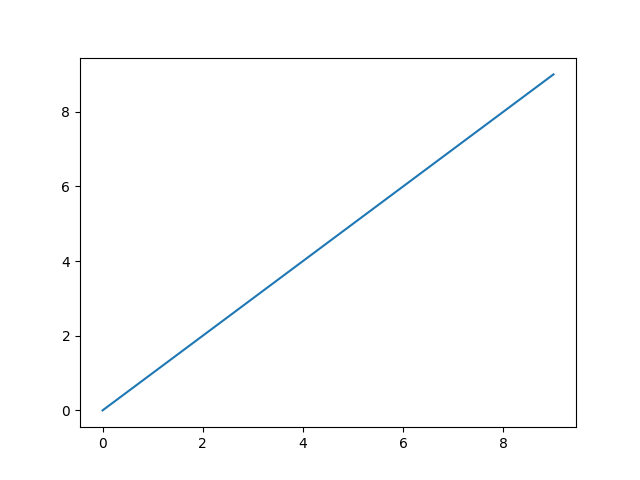

In [9]:
plt.plot(data)

### Figures and Subplots

<IPython.core.display.Javascript object>


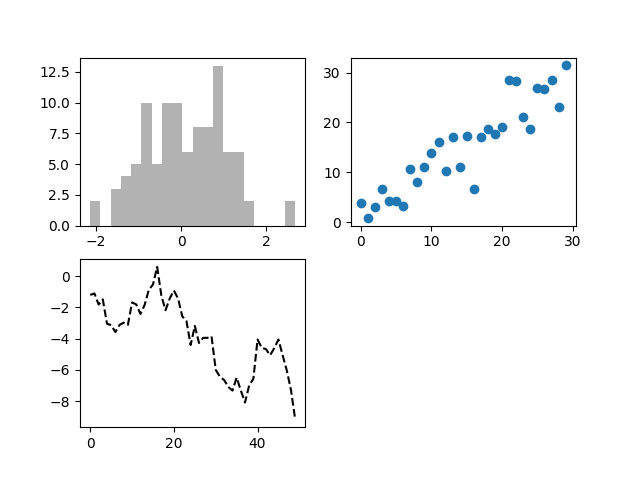

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [11]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [12]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [13]:
ax2.scatter(np.arange(30), np.arange(30) + 3*np.random.randn(30))

<IPython.core.display.Javascript object>


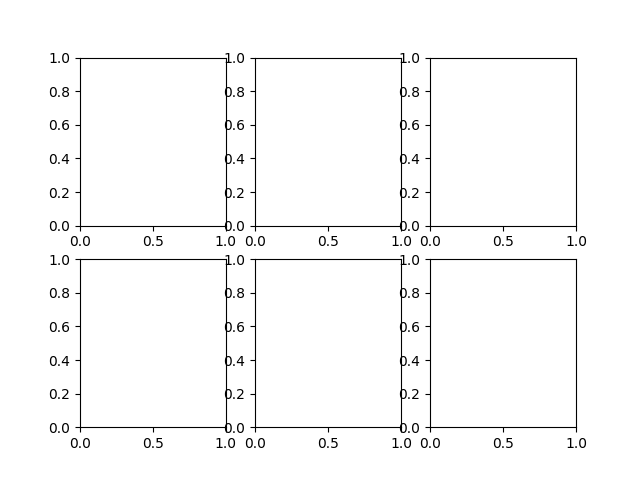

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ecf39b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10f2c2cc0>]], dtype=object)

In [14]:
fig, axes = plt.subplots(2, 3)
axes

<IPython.core.display.Javascript object>


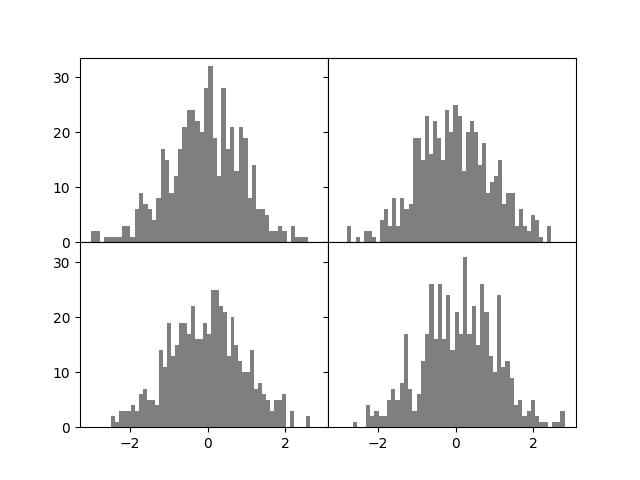

In [21]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

In [18]:
from numpy.random import randn

<IPython.core.display.Javascript object>


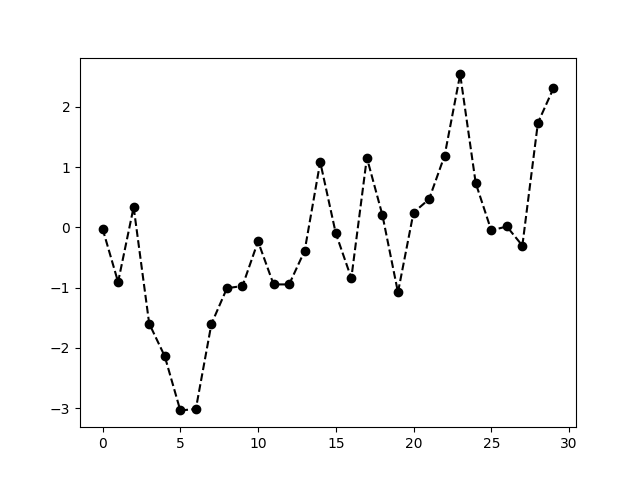

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(randn(30).cumsum(), 'ko--')

<IPython.core.display.Javascript object>


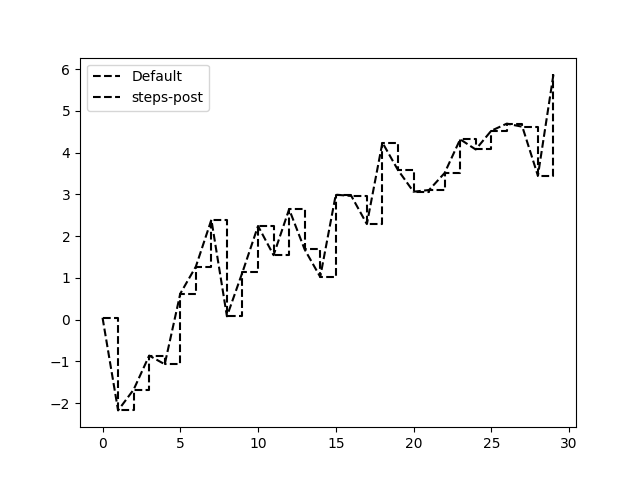

In [25]:
data = randn(30).cumsum()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data, 'k--', label='Default')
ax.plot(data, 'k--', drawstyle='steps-post', label='steps-post')
ax.legend(loc='best')

<IPython.core.display.Javascript object>


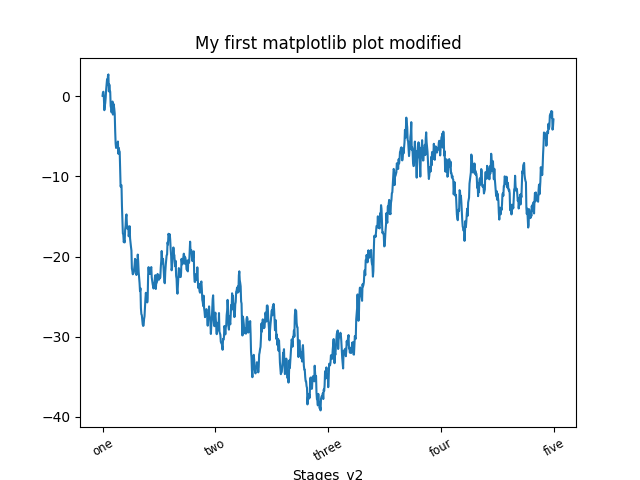

Text(0.5,0,'Stages')

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')
ax.set(title='My first matplotlib plot')
ax.set_xlabel('Stages')

In [28]:
props = {
    'title': 'My first matplotlib plot modified',
    'xlabel': 'Stages_v2'
}
ax.set(**props)

[Text(0.5,10.7639,'Stages_v2'),
 Text(0.5,1,'My first matplotlib plot modified')]

<IPython.core.display.Javascript object>


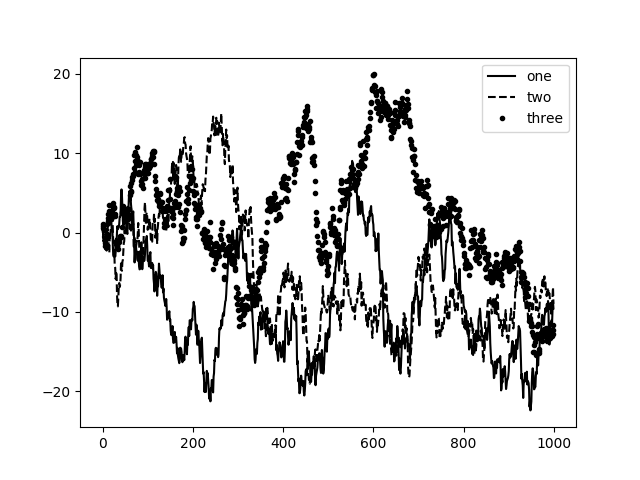

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

### Annotations and Drawing on a Subplot

In [34]:
from datetime import datetime
import pandas as pd

In [35]:
data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
data.head()

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


<IPython.core.display.Javascript object>


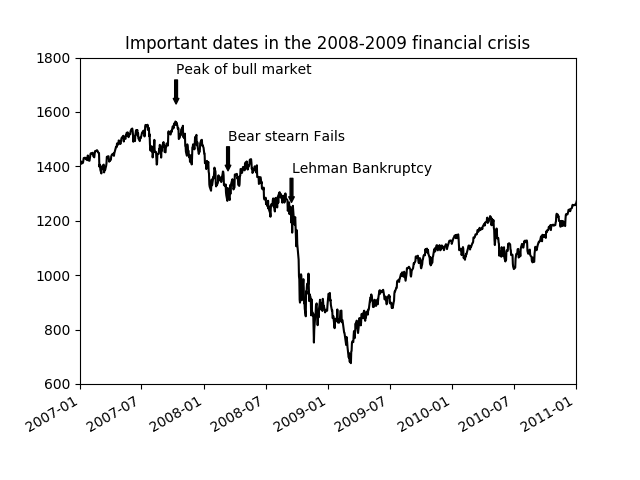

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
spx = data['SPX']
spx.plot(ax=ax, style='k-')

In [37]:
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear stearn Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
               xytext=(date, spx.asof(date) + 225),
               arrowprops=dict(facecolor='black', headwidth=4, width=2,
                              headlength=4),
               horizontalalignment='left', verticalalignment='top')

props = {
    'xlim': ['1/1/2007', '1/1/2011'],
    'ylim': [600, 1800],
    'title': 'Important dates in the 2008-2009 financial crisis'
}
ax.set(**props)

[(600, 1800),
 (732677.0, 734138.0),
 Text(0.5,1,'Important dates in the 2008-2009 financial crisis')]

<IPython.core.display.Javascript object>


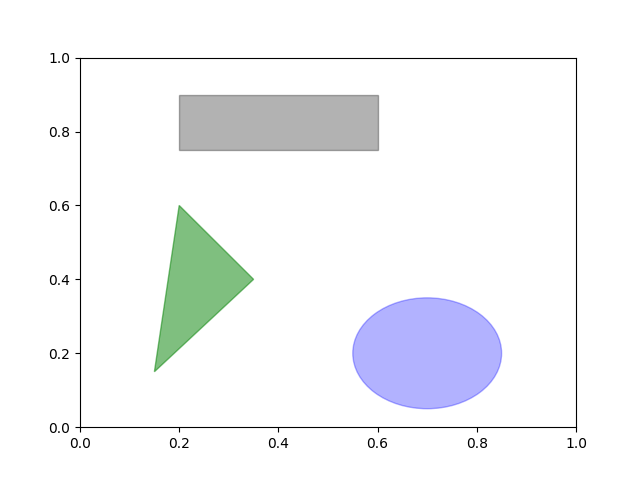

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                  color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

In [40]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

## 9.2 Plotting with pandas and seaborn

<IPython.core.display.Javascript object>


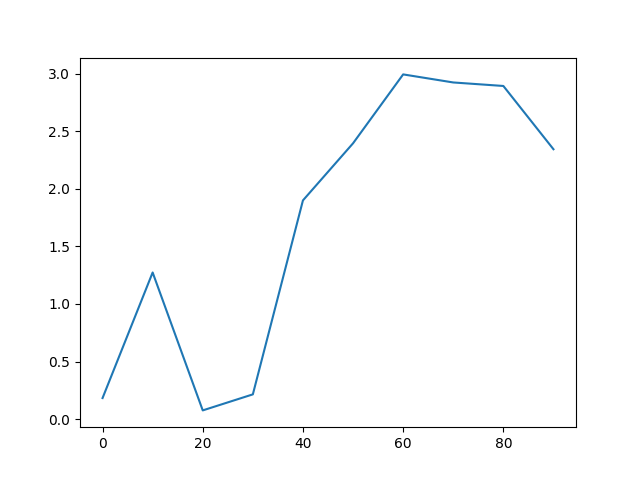

In [52]:
s = pd.Series(randn(10).cumsum(), index=np.arange(0, 100, 10))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(s)

<IPython.core.display.Javascript object>


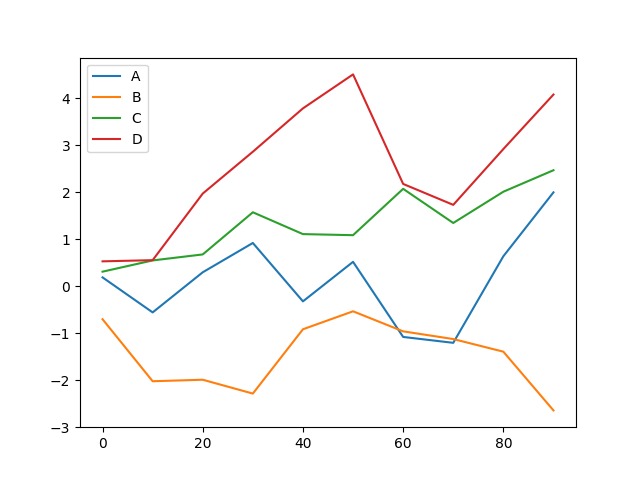

In [51]:
df = pd.DataFrame(randn(10, 4).cumsum(0), 
                 columns=['A', 'B', 'C', 'D'],
                 index=np.arange(0, 100, 10))
df.plot()

### Bar Plots

<IPython.core.display.Javascript object>


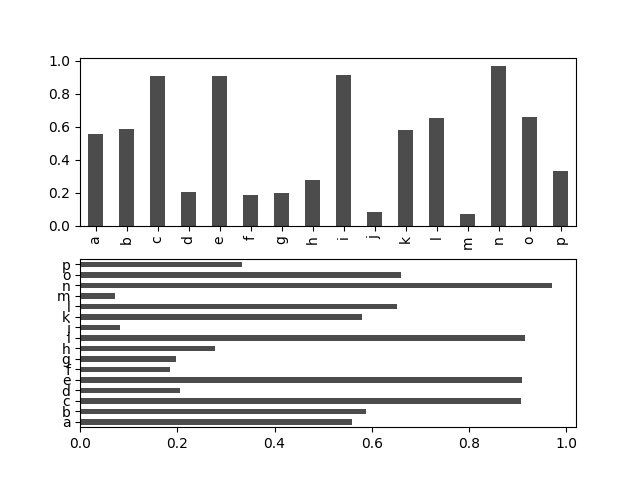

In [53]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)

In [54]:
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [56]:
df = pd.DataFrame(randn(6, 4),
                 index=['one', 'two', 'three', 'four', 'five', 'six'],
                 columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,-1.428862,-0.899175,0.533166,-0.240406
two,-0.970842,1.609324,-1.358147,-1.703669
three,1.591540,0.843421,0.827651,1.294790
four,-0.592933,3.117974,-1.318169,0.036907
five,-0.751360,-0.526843,-0.320460,-1.394228
six,-1.275802,-1.594011,0.110867,-0.495052


<IPython.core.display.Javascript object>


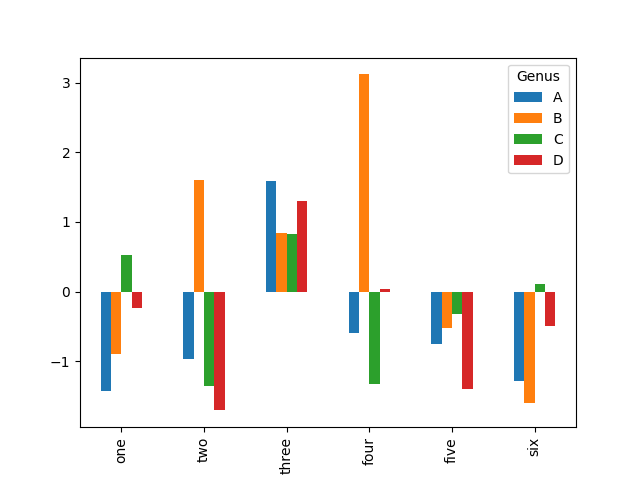

In [57]:
df.plot.bar()

<IPython.core.display.Javascript object>


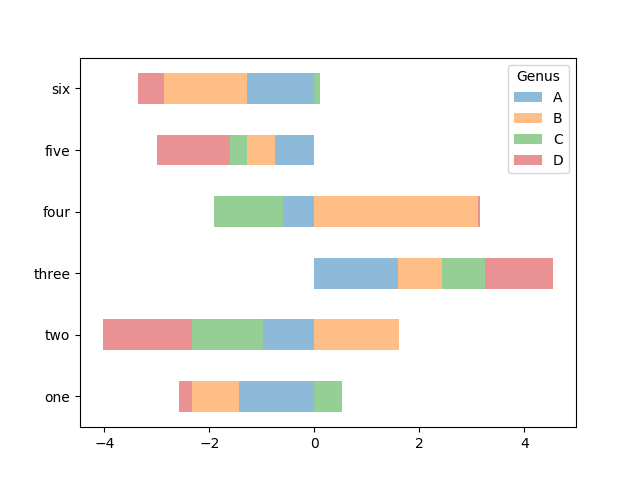

In [60]:
df.plot.barh(stacked=True, alpha=0.5)

In [62]:
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [63]:
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [64]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


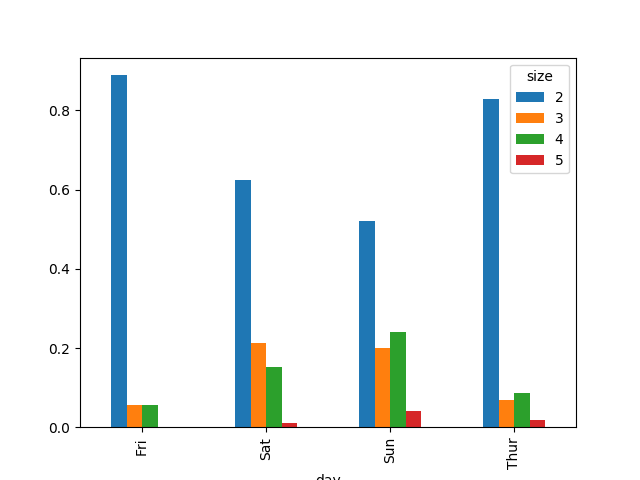

In [70]:
party_pcts.plot.bar()

In [66]:
import seaborn as sns

In [68]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<IPython.core.display.Javascript object>


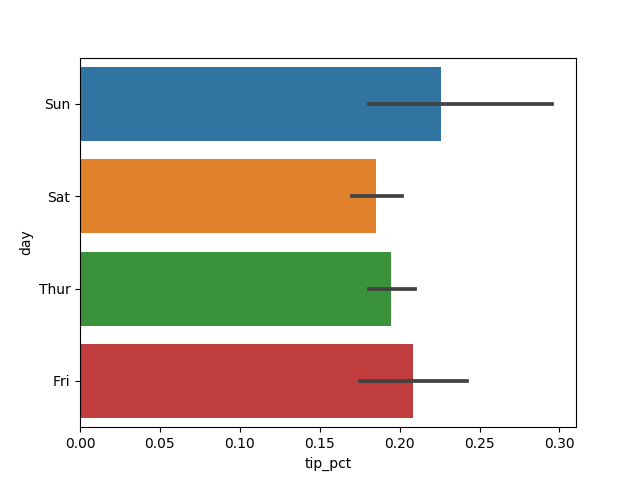

In [71]:
fig = plt.figure()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

<IPython.core.display.Javascript object>


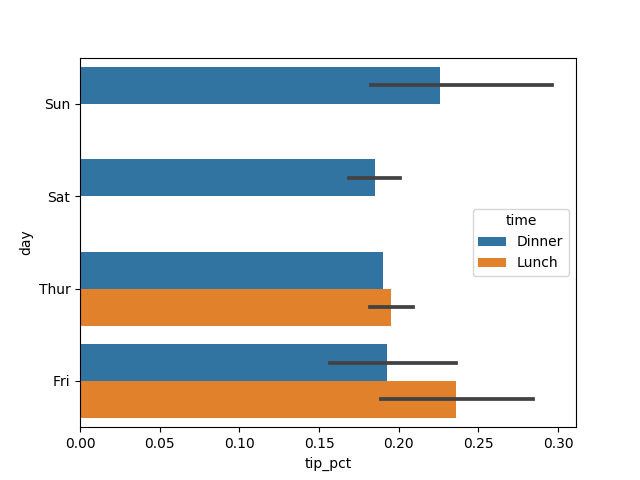

In [75]:
fig = plt.figure()
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

### Histograms and Density Plots

<IPython.core.display.Javascript object>


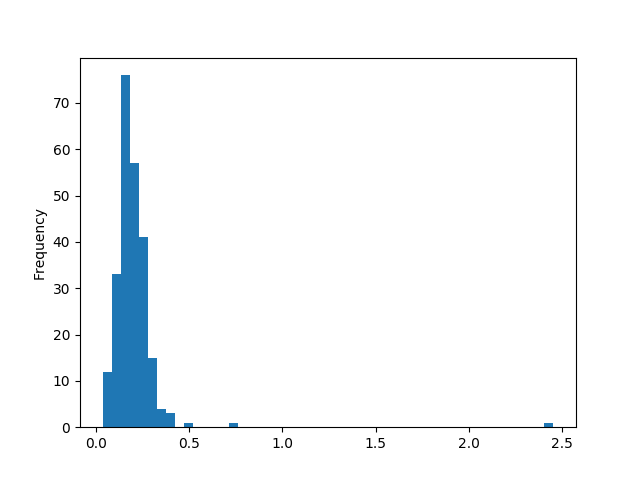

In [74]:
fig = plt.figure()
tips['tip_pct'].plot.hist(bins=50)

<IPython.core.display.Javascript object>


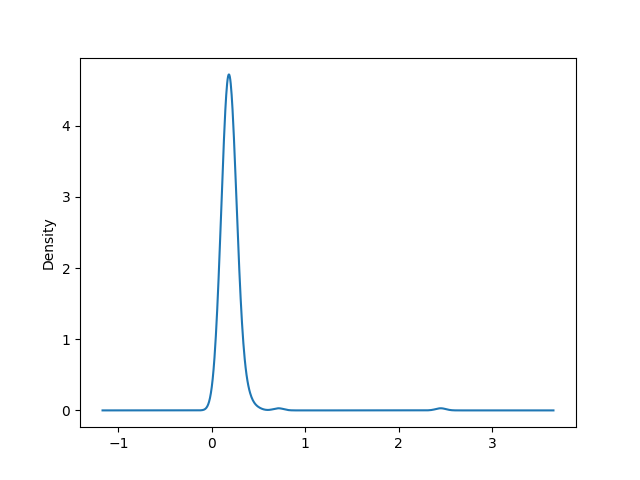

In [78]:
fig = plt.figure()
tips['tip_pct'].plot.density()

/Users/khwu/.virtualenvs/analytic/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


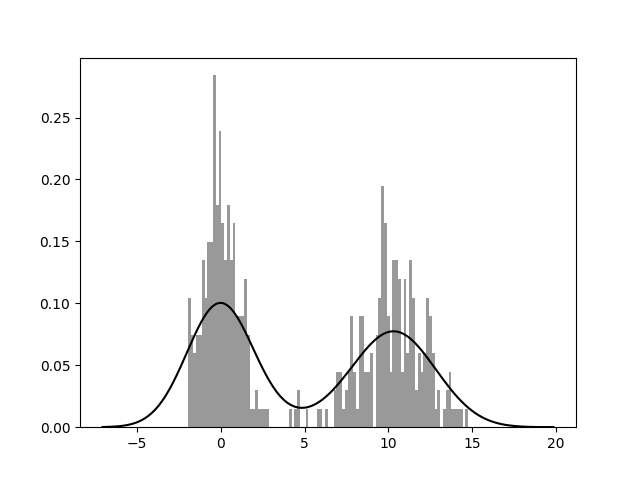

In [79]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
fig = plt.figure()
sns.distplot(values, bins=100, color='k')

### Scatter or Point Plots

In [80]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [81]:
trans_data = np.log(data).diff().dropna()
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


<IPython.core.display.Javascript object>


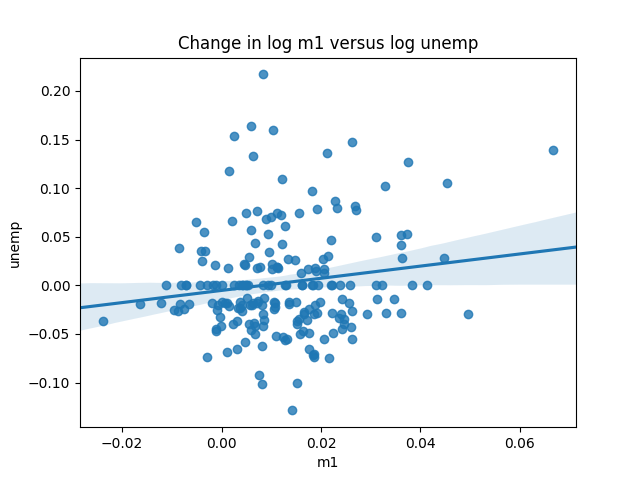

Text(0.5,1,'Change in log m1 versus log unemp')

In [83]:
fig = plt.figure()
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Change in log {:s} versus log {:s}'.format('m1', 'unemp'))

<IPython.core.display.Javascript object>


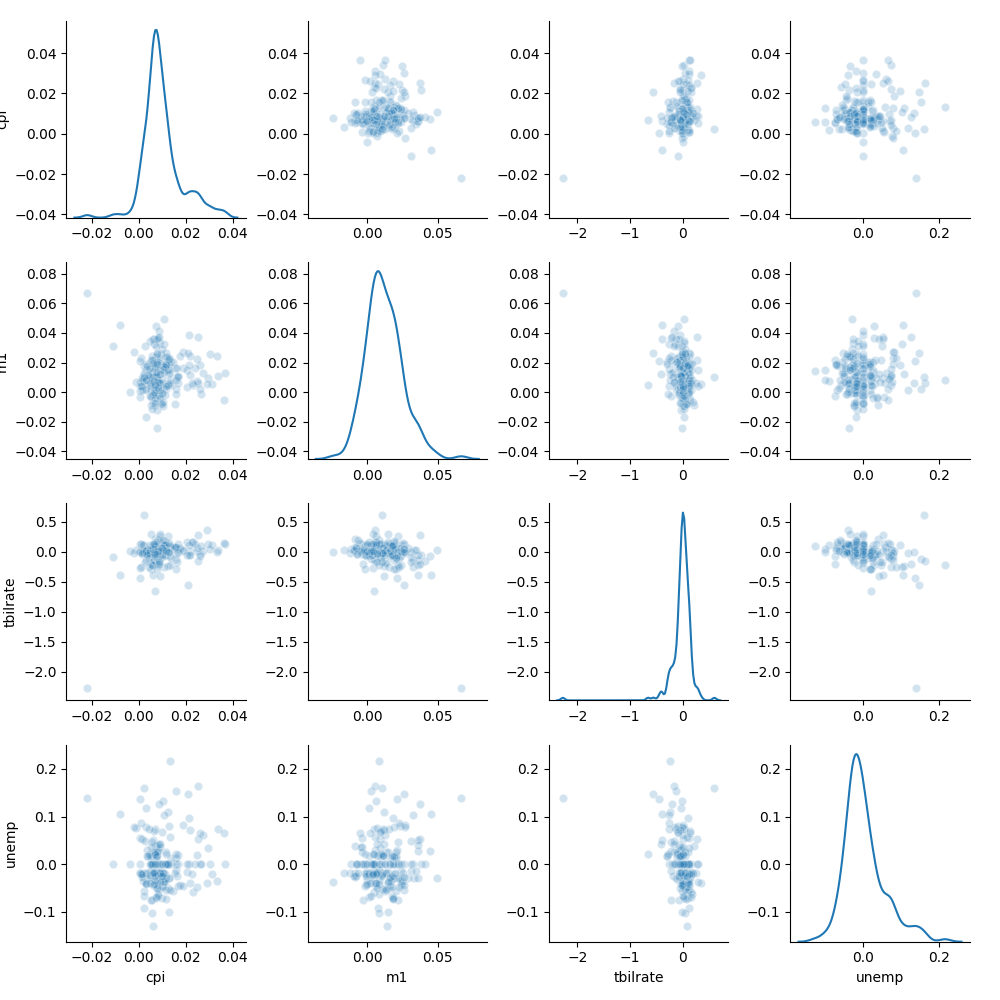

In [85]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### Facet Grids and Categorical Data

<IPython.core.display.Javascript object>


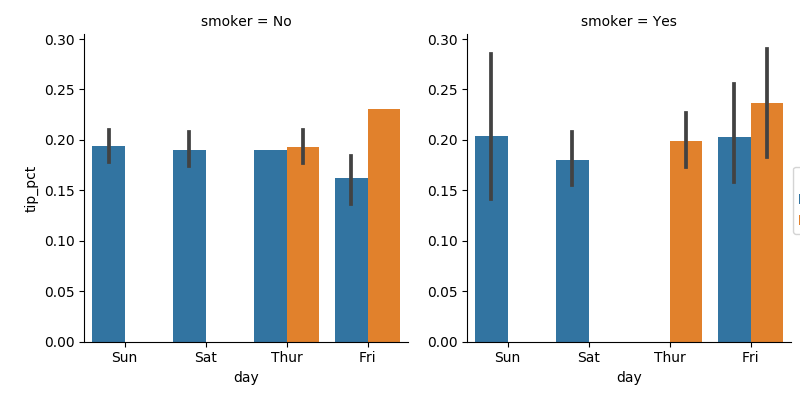

In [86]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
              kind='bar', data=tips[tips.tip_pct < 1])

<IPython.core.display.Javascript object>


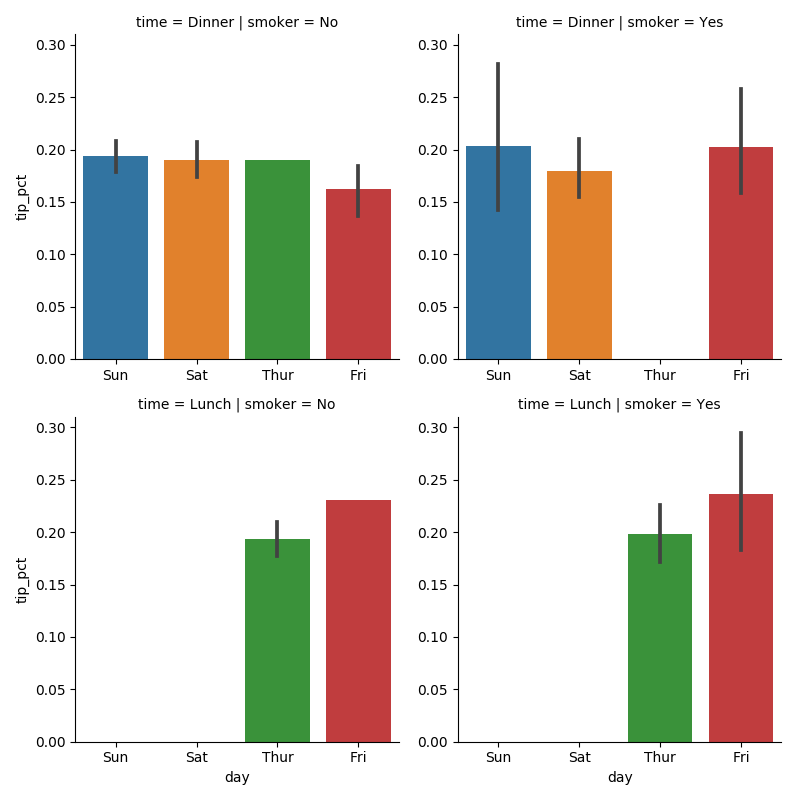

In [89]:
sns.factorplot(x='day', y='tip_pct', row='time',
              col='smoker', kind='bar',
              data=tips[tips.tip_pct < 1])

<IPython.core.display.Javascript object>


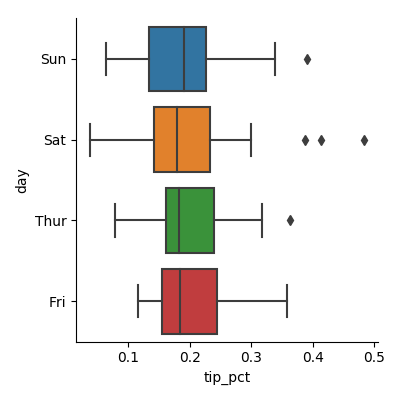

In [90]:
sns.factorplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])